In [1]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#loading the Training Dataset
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [13]:
#Use the Open Stock Price Column to Train Your Model.
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [14]:
#Normalizing the Dataset.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [15]:
#Creating X_train and y_train Data Structures.
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [17]:
#Reshape the Data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [18]:
#Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [19]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [22]:
#Fitting the Model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 120ms/step - loss: 0.0066
Epoch 2/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0041
Epoch 3/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0038
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0037
Epoch 5/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0044
Epoch 6/100
38/38 [==============================] - 9s 229ms/step - loss: 0.0039
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0040
Epoch 8/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 8s 196ms/step - loss: 0.0036
Epoch 10/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0036
Epoch 11/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0033
Epoch 12/100
38/38 [==============================] - 8s 218ms/step - loss: 0.0033
Epoch 13/100

In [23]:
#Extracting the actual Stock Prices of Jan-2017
dataset_test = pd.read_csv('/content/Google_Stock_Price_Train.csv')
actual_stock_price = dataset_test.iloc[:, 1:2].values

In [34]:
# Preparing the input for the model
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))


In [35]:
# Predicting the Values for Jan 2017 Stock Prices.
predicted_stock_price = regressor.predict(X_test);
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


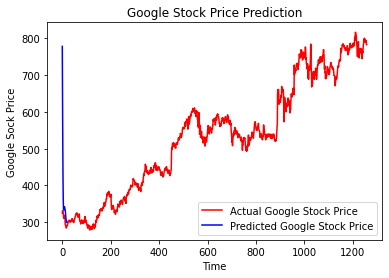

In [36]:
# Plotting the Actual and Predicted Prices for Google Stocks.
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Google Sock Price')

plt.legend()